In [144]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split ,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('bodyPerformance.csv')
df

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0           54.9                     18.4            60.0          217.0     C  
1           36.4                     16.3            53.0          229.0     A  
2           44.8                     12.0            49.0          181.0     C  
3           41.4                     15.2            53.0          219.0     B  
4           43.5                     27.1            45.0          217.0     B  
...          ...                      ...             ...            ...   ...  
13388       35.8                     17.4            47.0          198.0     C  
13389       33.0                      1.1            48.0          167.0     D  
13390       63.5                     16.4            45.0          229.0     A  
13391       19.3                      9.2             0.0           75.0     D  
13392       35.9                      7.1            51.0          180.0     C  

[13393 rows x 12 columns]

In [4]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [6]:
df['class'].value_counts()

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


# Handling Outliers

In [9]:
from scipy.stats import zscore

In [21]:
def get_outlier_iqr(arr):
    outlier= []
    q1 = np.quantile(arr,0.25) #>> 25th percentile 
    q2 = np.quantile(arr,0.5) #>> 50th Median 
    q3 = np.quantile(arr,0.75) #>> 75th percentile 
    print(f"{q1=} {q2=} {q3=}")
    IQR = q3 -q1
    print(f"IQR = {IQR}")
    lower_tail = q1 - 1.50 * IQR
    upper_tail = q3 + 1.50 * IQR
    print(f"{upper_tail=}")
    print(f"{lower_tail=}")
    
    for i in arr: 
        if i > upper_tail or i < lower_tail: 
            outlier.append(i)
    return outlier, upper_tail,lower_tail

In [25]:
outlier , upper, lower = get_outlier_iqr(df['age'])
outlier

q1=25.0 q2=32.0 q3=48.0
IQR = 23.0
upper_tail=82.5
lower_tail=-9.5


[]

In [26]:
#height_cm
outlier , upper, lower = get_outlier_iqr(df['height_cm'])
outlier

q1=162.4 q2=169.2 q3=174.8
IQR = 12.400000000000006
upper_tail=193.40000000000003
lower_tail=143.8


[139.8, 143.4, 141.0, 193.8, 143.6, 139.9, 139.5, 125.0, 140.5, 143.7]

In [43]:
len(outlier)

10

In [18]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(13392, 12)

In [27]:
import seaborn as sns

<AxesSubplot: xlabel='height_cm', ylabel='Density'>

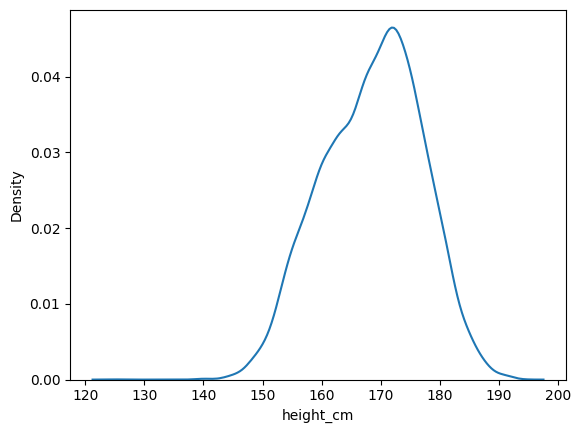

In [32]:
sns.kdeplot(df['height_cm'])

In [55]:
df.loc[(df["height_cm"]>upper) | (df["height_cm"]<lower),"height_cm"]  = df["height_cm"].mean() 

<AxesSubplot: xlabel='height_cm'>

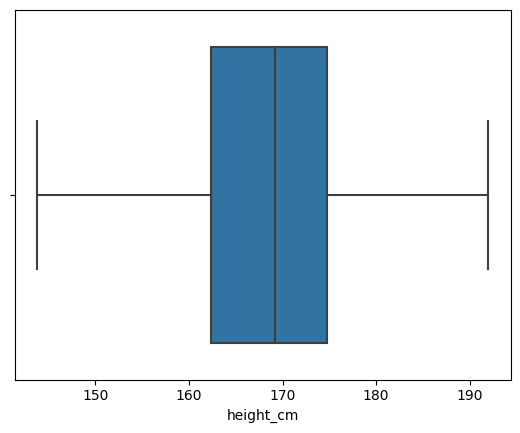

In [56]:
sns.boxplot(x=df["height_cm"])

In [57]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [58]:
outlier, upper, lower = get_outlier_iqr(df['weight_kg'])

q1=58.2 q2=67.4 q3=75.3
IQR = 17.099999999999994
upper_tail=100.94999999999999
lower_tail=32.55000000000001


<AxesSubplot: xlabel='weight_kg'>

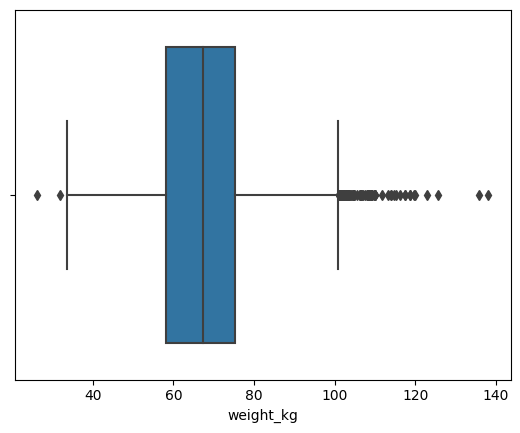

In [61]:
sns.boxplot(x=df['weight_kg'])

<AxesSubplot: xlabel='weight_kg', ylabel='Density'>

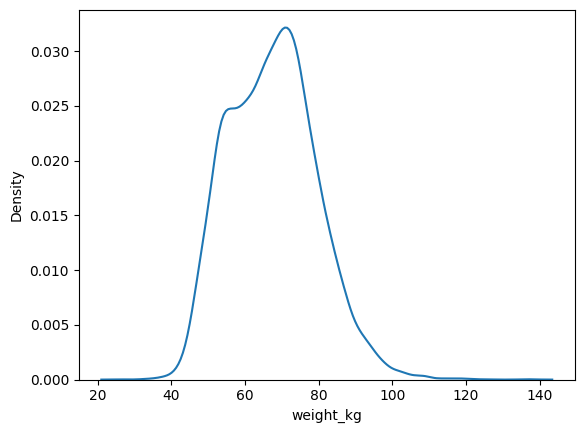

In [62]:
sns.kdeplot(df['weight_kg'])

In [65]:
df.loc[(df['weight_kg']<lower) | (df['weight_kg']>upper), 'weight_kg'] = df['weight_kg'].median()

<AxesSubplot: xlabel='weight_kg'>

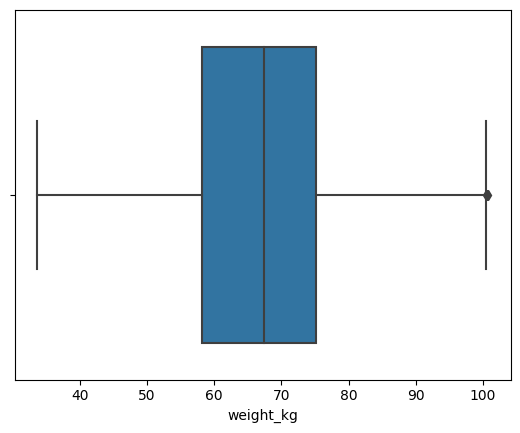

In [66]:
sns.boxplot(x=df['weight_kg'])

In [67]:
outlier, upper, lower = get_outlier_iqr(df['body fat_%'])

q1=18.0 q2=22.8 q3=28.0
IQR = 10.0
upper_tail=43.0
lower_tail=3.0


<AxesSubplot: xlabel='body fat_%', ylabel='Density'>

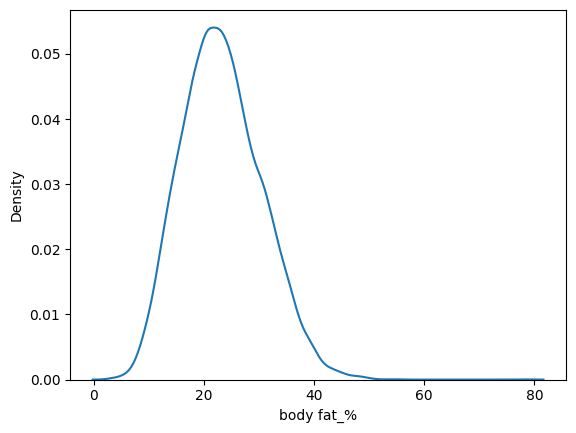

In [70]:
sns.kdeplot(df['body fat_%'])

<AxesSubplot: xlabel='body fat_%'>

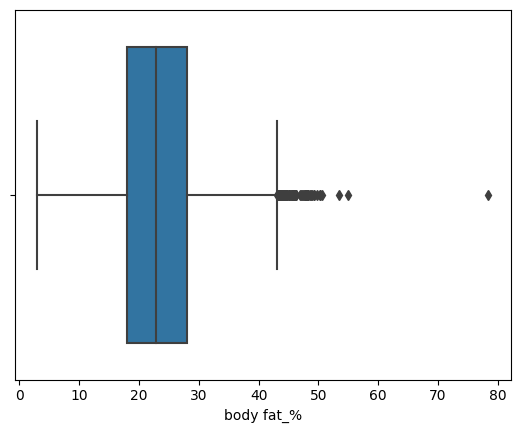

In [71]:
sns.boxplot(x=df['body fat_%'])

In [73]:
df.loc[(df['body fat_%']<lower)|(df['body fat_%']>upper),'body fat_%'] = df['body fat_%'].mean()

<AxesSubplot: xlabel='body fat_%'>

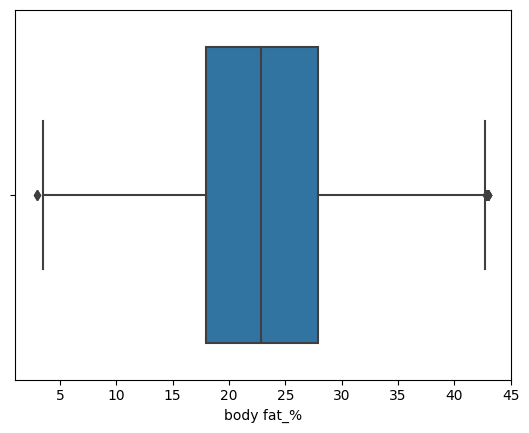

In [74]:
sns.boxplot(x=df['body fat_%'])

In [76]:
outlier,upper,lower = get_outlier_iqr(df['diastolic'])

q1=71.0 q2=79.0 q3=86.0
IQR = 15.0
upper_tail=108.5
lower_tail=48.5


<AxesSubplot: xlabel='diastolic', ylabel='Density'>

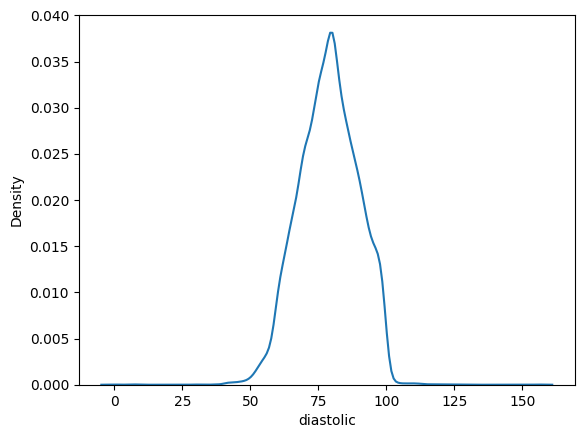

In [78]:
sns.kdeplot(df['diastolic'])

In [83]:
df.loc[(df['diastolic']<lower)|(df['diastolic']>upper),'diastolic'] = df['diastolic'].mean()

<AxesSubplot: xlabel='diastolic'>

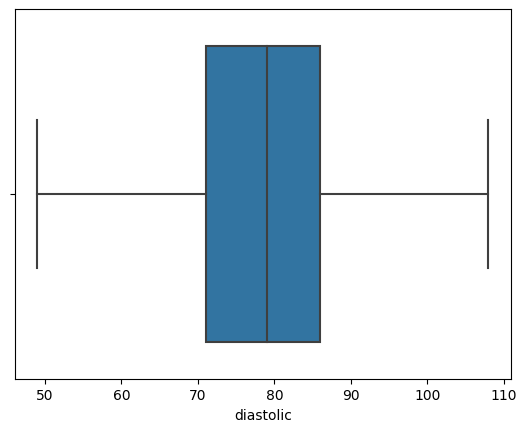

In [84]:
sns.boxplot(x=df['diastolic'])

In [85]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [88]:
outlier,upper,lower = get_outlier_iqr(df['systolic'])

q1=120.0 q2=130.0 q3=141.0
IQR = 21.0
upper_tail=172.5
lower_tail=88.5


<AxesSubplot: xlabel='systolic', ylabel='Density'>

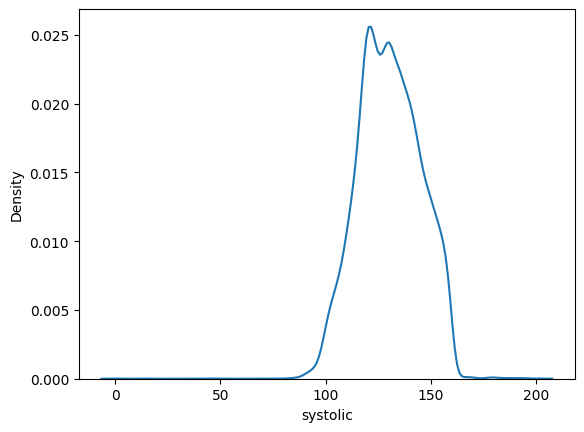

In [94]:
sns.kdeplot(df['systolic'])

In [95]:
df.loc[(df['systolic']<lower)|(df['systolic']>upper),'systolic'] = df['systolic'].median()

<AxesSubplot: xlabel='systolic'>

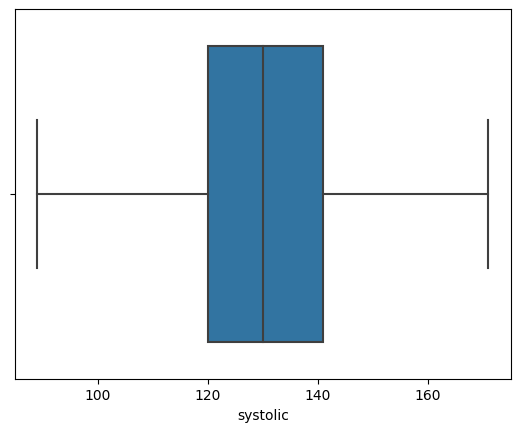

In [97]:
sns.boxplot(x=df['systolic'])

In [101]:
outlier ,upper ,lower = get_outlier_iqr(df['gripForce'])

q1=27.5 q2=37.9 q3=45.2
IQR = 17.700000000000003
upper_tail=71.75
lower_tail=0.9499999999999957


In [105]:
df.loc[(df['gripForce']<lower)|(df['gripForce']>upper),'gripForce'] = np.nan

In [108]:
df.dropna(inplace=True)
df.shape

(13389, 12)

<AxesSubplot: xlabel='gripForce'>

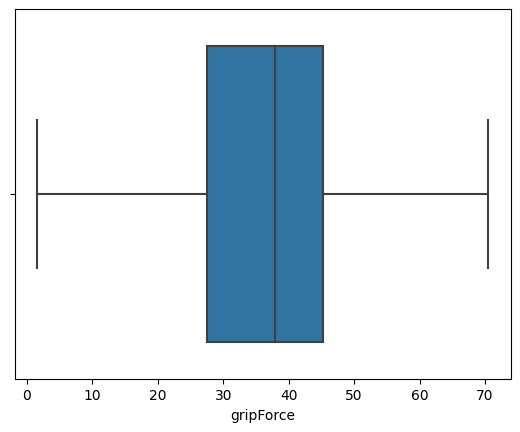

In [110]:
sns.boxplot(x=df['gripForce'])

In [109]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [112]:
outlier, upper,lower = get_outlier_iqr(df['sit and bend forward_cm'])

q1=10.9 q2=16.2 q3=20.7
IQR = 9.799999999999999
upper_tail=35.4
lower_tail=-3.799999999999999


In [116]:
df.drop('sit and bend forward_cm',inplace =True,axis = 1)

In [118]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit-ups counts', 'broad jump_cm', 'class'],
      dtype='object')

<AxesSubplot: xlabel='sit-ups counts'>

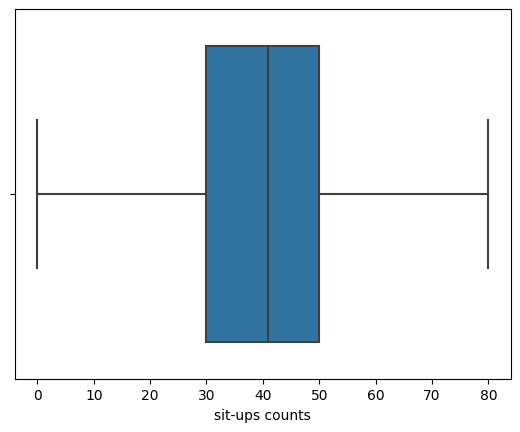

In [119]:
sns.boxplot(x= df['sit-ups counts'])

<AxesSubplot: xlabel='broad jump_cm'>

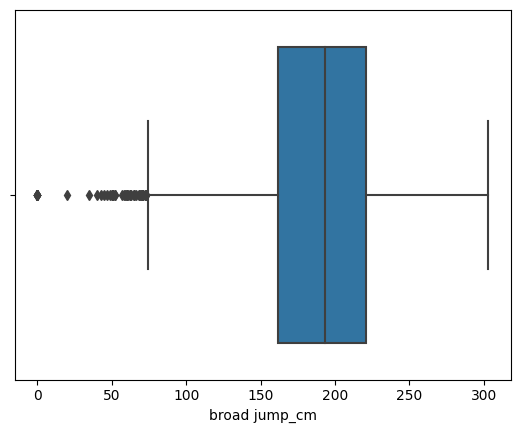

In [120]:
sns.boxplot(x=df['broad jump_cm'])

In [121]:
outlier,upper,lower = get_outlier_iqr(df['broad jump_cm'])

q1=162.0 q2=193.0 q3=221.0
IQR = 59.0
upper_tail=309.5
lower_tail=73.5


In [122]:
len(outlier)

57

In [127]:
df.loc[(df['broad jump_cm']<lower)|(df['broad jump_cm']>upper),'broad jump_cm'] =df['broad jump_cm'].median()

<AxesSubplot: xlabel='broad jump_cm'>

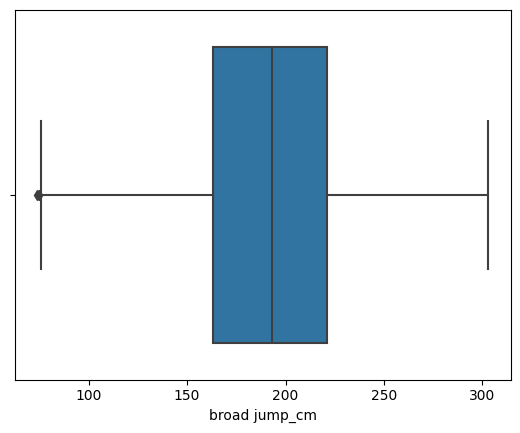

In [128]:
sns.boxplot(x=df['broad jump_cm'])

# Encoding

In [130]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit-ups counts', 'broad jump_cm', 'class'],
      dtype='object')

In [132]:
df.gender.value_counts()

M    8465
F    4924
Name: gender, dtype: int64

In [133]:
gender = {"M":1,'F':0}
df.gender.replace(gender,inplace=True)

In [134]:
df.gender.value_counts()

1    8465
0    4924
Name: gender, dtype: int64

In [135]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit-ups counts', 'broad jump_cm', 'class'],
      dtype='object')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13389 entries, 0 to 13392
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             13389 non-null  float64
 1   gender          13389 non-null  int64  
 2   height_cm       13389 non-null  float64
 3   weight_kg       13389 non-null  float64
 4   body fat_%      13389 non-null  float64
 5   diastolic       13389 non-null  float64
 6   systolic        13389 non-null  float64
 7   gripForce       13389 non-null  float64
 8   sit-ups counts  13389 non-null  float64
 9   broad jump_cm   13389 non-null  float64
 10  class           13389 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


In [139]:
df['class'].value_counts()

C    3348
D    3348
A    3347
B    3346
Name: class, dtype: int64

In [140]:
label = {'A':0,'B':1,'C':2,'D':3}
df['class'].replace(label,inplace=True)

In [142]:
df['class'].value_counts()

2    3348
3    3348
0    3347
1    3346
Name: class, dtype: int64

In [143]:
df

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0       1      172.3      75.24        21.3       80.0     130.0   
1      25.0       1      165.0      55.80        15.7       77.0     126.0   
2      31.0       1      179.6      78.00        20.1       92.0     152.0   
3      32.0       1      174.5      71.10        18.4       76.0     147.0   
4      28.0       1      173.8      67.70        17.1       70.0     127.0   
...     ...     ...        ...        ...         ...        ...       ...   
13388  25.0       1      172.1      71.80        16.2       74.0     141.0   
13389  21.0       1      179.7      63.90        12.1       74.0     128.0   
13390  39.0       1      177.2      80.50        20.1       78.0     132.0   
13391  64.0       0      146.1      57.70        40.4       68.0     121.0   
13392  34.0       1      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit-ups counts  broad jump_cm  class  
0           54.9            60.0          217.0      2  
1           36.4            53.0          229.0      0  
2           44.8            49.0          181.0      2  
3           41.4            53.0          219.0      1  
4           43.5            45.0          217.0      1  
...          ...             ...            ...    ...  
13388       35.8            47.0          198.0      2  
13389       33.0            48.0          167.0      3  
13390       63.5            45.0          229.0      0  
13391       19.3             0.0           75.0      3  
13392       35.9            51.0          180.0      2  

[13389 rows x 11 columns]

In [146]:
x = df.drop('class',axis=1)
x.head()

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0       1      172.3      75.24        21.3       80.0     130.0   
1  25.0       1      165.0      55.80        15.7       77.0     126.0   
2  31.0       1      179.6      78.00        20.1       92.0     152.0   
3  32.0       1      174.5      71.10        18.4       76.0     147.0   
4  28.0       1      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit-ups counts  broad jump_cm  
0       54.9            60.0          217.0  
1       36.4            53.0          229.0  
2       44.8            49.0          181.0  
3       41.4            53.0          219.0  
4       43.5            45.0          217.0

In [148]:
y = df['class']


# Scalling

In [150]:
std = StandardScaler()
arr = std.fit_transform(x)
new_x = pd.DataFrame(arr,columns=x.columns)
new_x.head()

age    gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0 -0.717537  0.762686   0.443644   0.698223   -0.256986   0.109777 -0.014748   
1 -0.864317  0.762686  -0.426547  -0.992163   -1.053564  -0.177458 -0.291893   
2 -0.423977  0.762686   1.313835   0.938216   -0.427681   1.258714  1.509546   
3 -0.350588  0.762686   0.705893   0.338233   -0.669499  -0.273202  1.163116   
4 -0.644147  0.762686   0.622450   0.042590   -0.854419  -0.847671 -0.222607   

   gripForce  sit-ups counts  broad jump_cm  
0   1.689434        1.417049       0.677608  
1  -0.053985        0.926756       0.987213  
2   0.737622        0.646588      -0.251208  
3   0.417209        0.926756       0.729209  
4   0.615111        0.366421       0.677608

In [151]:
x_train,x_test,y_train,y_test = train_test_split(new_x,y,test_size=0.3,random_state=17,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9372, 10), (4017, 10), (9372,), (4017,))

# Feature selection

# Model Training